# Group- sQuad
Akash Vishwakarma,
Sneha Ganesh,
Deepa Ghag,
Deepika Nishad,
Umesh Unnikrishnan

# Problem Statement

The investments series are given for the startup companies.

These companies are at three different status - operating, closed or acquired stage.

The aim of this project is to create a model to classify the company status based on the available features.

In [1]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data

sic=pd.read_csv("Startupinvest.csv",encoding='latin1')

In [3]:
# widen the columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# top 5

sic.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list         market  \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

  funding_total_usd      status country_code state_code         region  \
0          17,50,000   acquired          USA         NY  New York City   
1          40,00,000  operating          USA         CA    Los Angeles   
2             40,000  operating          EST        NaN        Tallinn   
3          15,00,000  operating          GBR        NaN         London   
4             60,000  operating          USA         TX         Dallas   

          city  funding_rounds  founded_at founded_month founded_quarter  \
0     New York               1  01-06-2012       2012-06         2012-Q2   
1  Los Angeles               2         NaN           NaN             NaN   
2      Tallinn               1  26-10-2012       2012-10         2012-Q4   
3       London               1  01-04-2011       2011-04         2011-Q2   
4   Fort Worth               2  01-01-2014       2014-01         2014-Q1   

   founded_year first_funding_at last_funding_at     seed  venture  \
0        2012.0       30-06-2012      30-06-2012  1750000        0   
1           NaN       04-06-2010      23-09-2010        0  4000000   
2        2012.0       09-08-2012      09-08-2012    40000        0   
3        2011.0       01-04-2011      01-04-2011  1500000        0   
4        2014.0       17-08-2014      26-09-2014        0        0   

   equity_crowdfunding  undisclosed  convertible_note  debt_financing  angel  \
0                    0            0                 0               0      0   
1                    0            0                 0               0      0   
2                    0            0                 0               0      0   
3                    0            0                 0               0      0   
4                60000            0                 0               0      0   

   grant  private_equity  post_ipo_equity  post_ipo_debt  secondary_market  \
0      0               0                0              0                 0   
1      0               0                0              0                 0   
2      0               0                0              0                 0   
3      0               0                0              0                 0   
4      0               0                0              0                 0   

   product_crowdfunding  round_A  round_B  round_C  round_D  round_E  round_F  \
0                     0        0        0        0        0        0        0   
1                     0        0        0        0        0        0        0   
2                     0        0        0        0        0        0        0   
3                     0        0        0        0        0        0        0   
4                     0        0        0        0        0        0        0   

   round_G  round_H  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0

In [5]:
# rows and columns

sic.shape

(49438, 39)

In [6]:
# missing values

sic.isna().sum()

permalink                   0
name                        1
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [7]:
import missingno as msno
def missing_bar():
    msno.bar(sic.sample(1000))

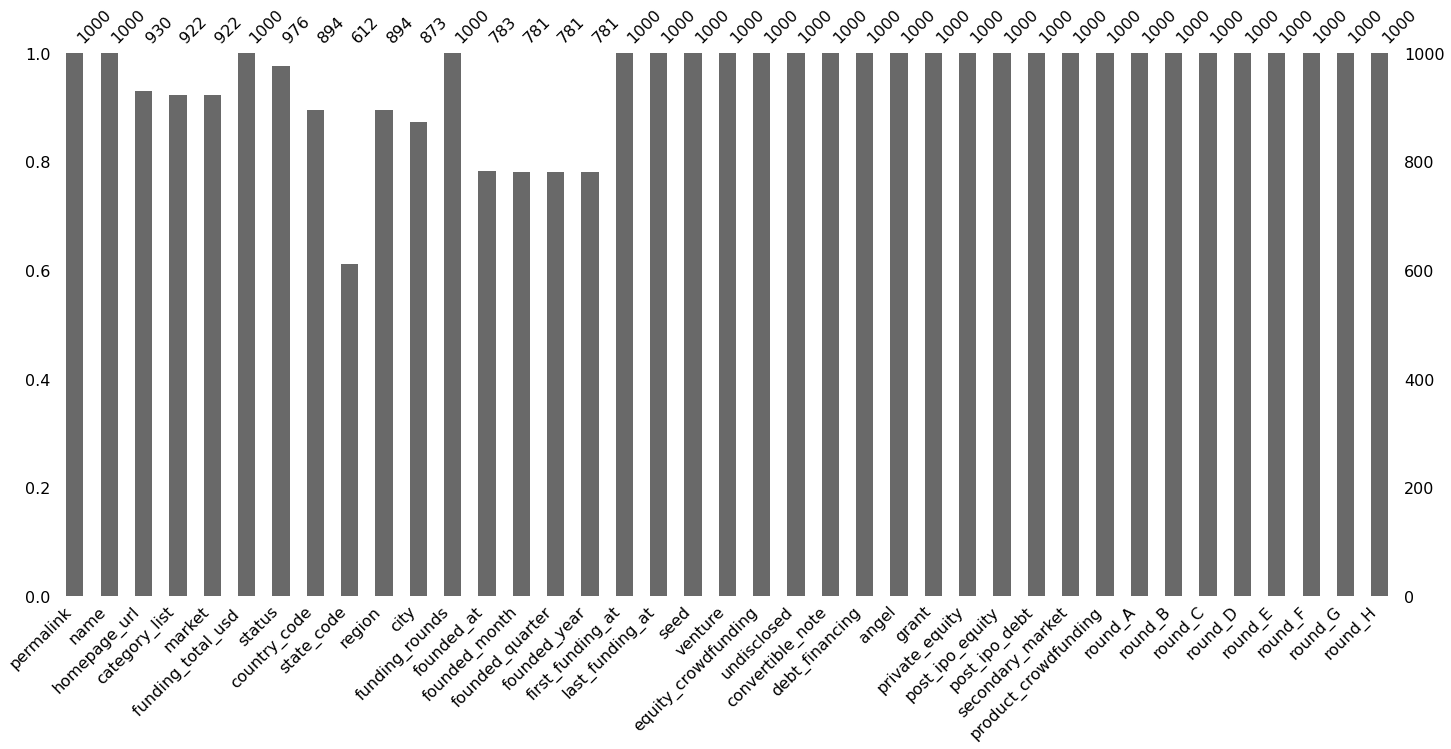

In [8]:
missing_bar()

A lot of seemingly linked nulls, dropping rows of one of those columns as they are likely null across the 
columns

In [9]:
# column names

sic.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [10]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [11]:
# total number of categorical columns

cols = sic.columns
num_cols = sic._get_numeric_data().columns
a=list(set(cols) - set(num_cols))
print('No of Categorical columns:',len(a),"\n",a)

No of Categorical columns: 16 
 ['permalink', 'founded_at', 'funding_total_usd ', 'last_funding_at', 'country_code', 'category_list', 'founded_quarter', 'homepage_url', 'founded_month', 'status', 'name', 'first_funding_at', 'region', 'state_code', 'city', 'market']


In [12]:
# total number of continuous columns #numeric

print("No of Continuous columns:",len(sic._get_numeric_data().columns))
print(sic._get_numeric_data().columns)

No of Continuous columns: 23
Index(['funding_rounds', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')


In [13]:
sic['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

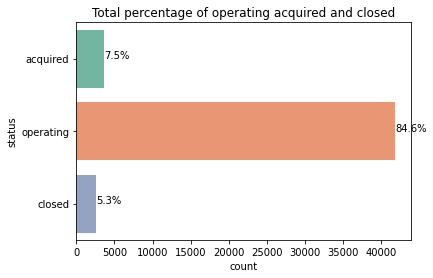

In [14]:
# total % of each status

ax = sns.countplot(y="status", data=sic, palette="Set2")
ax.set_title('Total percentage of operating acquired and closed')

total = len(sic['status'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.annotate(percentage, (x,y))

plt.show()

In [15]:
# descriptive statistics

sic.describe(include='all')

permalink   name  \
count                                            49438  49437   
unique                                           49436  49350   
top     /organization/treasure-valley-urology-services  Roost   
freq                                                 2      4   
mean                                               NaN    NaN   
std                                                NaN    NaN   
min                                                NaN    NaN   
25%                                                NaN    NaN   
50%                                                NaN    NaN   
75%                                                NaN    NaN   
max                                                NaN    NaN   

              homepage_url category_list      market funding_total_usd   \
count                45989         45477       45470              49438   
unique               45850         16675         753              14617   
top     http://newhive.com    |Software|   Software                -      
freq                     2          3650        4620               8531   
mean                   NaN           NaN         NaN                NaN   
std                    NaN           NaN         NaN                NaN   
min                    NaN           NaN         NaN                NaN   
25%                    NaN           NaN         NaN                NaN   
50%                    NaN           NaN         NaN                NaN   
75%                    NaN           NaN         NaN                NaN   
max                    NaN           NaN         NaN                NaN   

           status country_code state_code       region           city  \
count       48124        44165      30161        44165          43322   
unique          3          115         61         1089           4188   
top     operating          USA         CA  SF Bay Area  San Francisco   
freq        41829        28793       9917         6804           2615   
mean          NaN          NaN        NaN          NaN            NaN   
std           NaN          NaN        NaN          NaN            NaN   
min           NaN          NaN        NaN          NaN            NaN   
25%           NaN          NaN        NaN          NaN            NaN   
50%           NaN          NaN        NaN          NaN            NaN   
75%           NaN          NaN        NaN          NaN            NaN   
max           NaN          NaN        NaN          NaN            NaN   

        funding_rounds  founded_at founded_month founded_quarter  \
count     49438.000000       38554         38482           38482   
unique             NaN        3369           420             218   
top                NaN  01-01-2012       2012-01         2012-Q1   
freq               NaN        2181          2327            2904   
mean          1.696205         NaN           NaN             NaN   
std           1.294213         NaN           NaN             NaN   
min           1.000000         NaN           NaN             NaN   
25%           1.000000         NaN           NaN             NaN   
50%           1.000000         NaN           NaN             NaN   
75%           2.000000         NaN           NaN             NaN   
max          18.000000         NaN           NaN             NaN   

        founded_year first_funding_at last_funding_at          seed  \
count   38482.000000            49438           49438  4.943800e+04   
unique           NaN             3914            3657           NaN   
top              NaN       01-01-2012      01-01-2013           NaN   
freq             NaN              468             387           NaN   
mean     2007.359129              NaN             NaN  2.173215e+05   
std         7.579203              NaN             NaN  1.056985e+06   
min      1902.000000              NaN             NaN  0.000000e+00   
25%      2006.000000              NaN             NaN  0.000000e+00   
50%      2010.000000          

In [16]:
# dropping unwanted columns

sic.drop(['permalink', 'homepage_url', 'name','state_code'], axis=1, inplace= True)
sic.columns

Index(['category_list', 'market', 'funding_total_usd ', 'status',
       'country_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

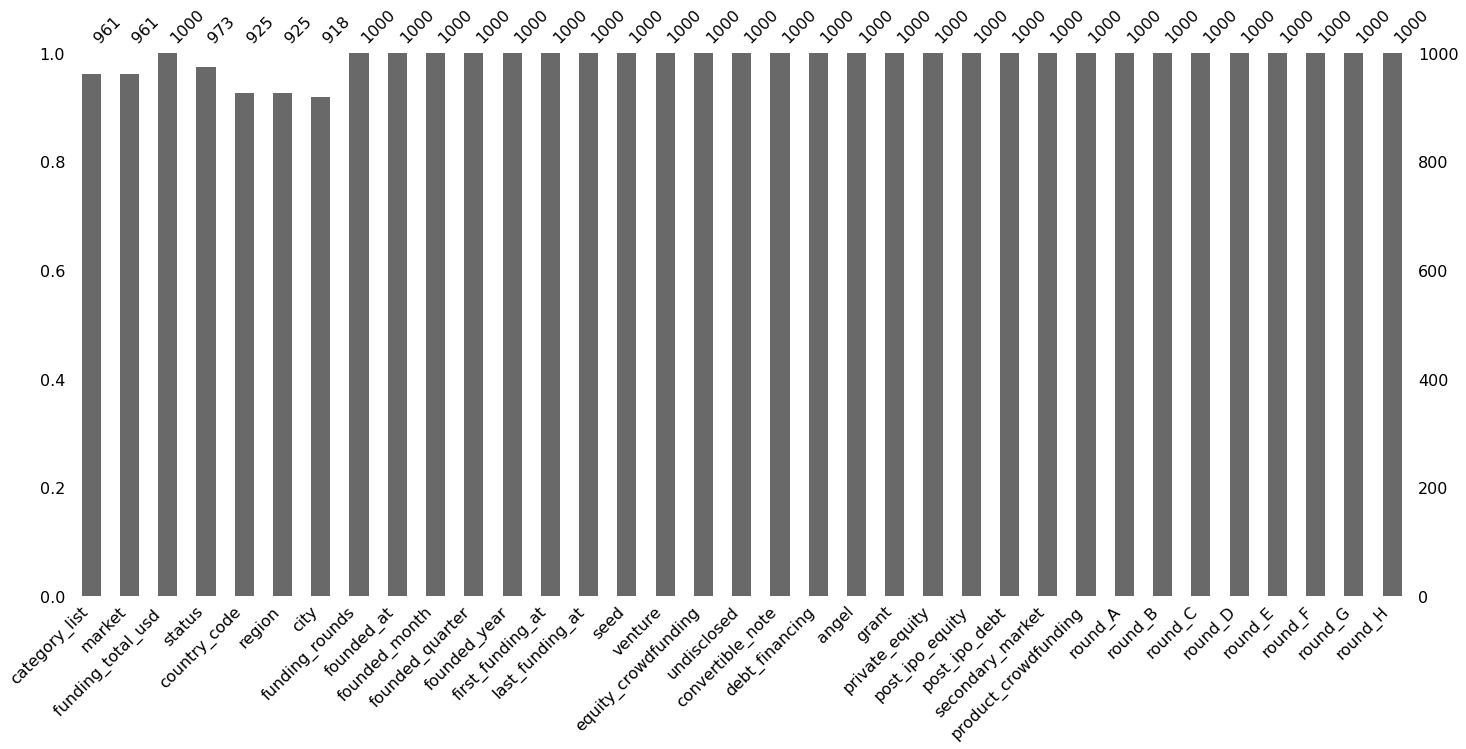

In [17]:
sic = sic[sic['founded_year'].notna()]
missing_bar()

In [18]:
# random sample 

sic.sample(3)

category_list              market funding_total_usd      status  \
27456          |Software|           Software           20,49,999  operating   
8706   |Travel & Tourism|   Travel & Tourism         1,00,00,000  operating   
31981       |Curated Web|        Curated Web                -     operating   

      country_code         region           city  funding_rounds  founded_at  \
27456          USA  Oklahoma City  Oklahoma City               1  01-01-2009   
8706           BRA      Sao Paulo            NaN               2  01-08-2013   
31981          USA    SF Bay Area      Los Altos               1  01-10-2006   

      founded_month founded_quarter  founded_year first_funding_at  \
27456       2009-01         2009-Q1        2009.0       12-05-2014   
8706        2013-08         2013-Q3        2013.0       01-02-2014   
31981       2006-10         2006-Q4        2006.0       01-10-2006   

      last_funding_at     seed   venture  equity_crowdfunding  undisclosed  \
27456      12-05-2014  2049999         0                    0            0   
8706       20-08-2014        0  10000000                    0            0   
31981      01-10-2006        0         0                    0            0   

       convertible_note  debt_financing  angel  grant  private_equity  \
27456                 0               0      0      0               0   
8706                  0               0      0      0               0   
31981                 0               0      0      0               0   

       post_ipo_equity  post_ipo_debt  secondary_market  product_crowdfunding  \
27456                0              0                 0                     0   
8706                 0              0                 0                     0   
31981                0              0                 0                     0   

       round_A  round_B  round_C  round_D  round_E  round_F  round_G  round_H  
27456        0        0        0        0        0        0        0        0  
8706         0        0        0        0        0        0        0        0  
31981        0        0        0        0        0        0        0        0

In [19]:
# unique value counts in category list

sic['category_list'].value_counts()

|Software|                                                                                                                                                                                                                                                         2880
|Biotechnology|                                                                                                                                                                                                                                                    2395
|E-Commerce|                                                                                                                                                                                                                                                        946
|Mobile|                                                                                                                                                                                                        

In [20]:
# Some column names had whitespaces...so strip these white spaces

sic.rename(columns=lambda col:col.strip(), inplace=True)
sic.columns

Index(['category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [21]:
# unique value counts in category list

sic['market'].value_counts()

 Software                                  3784
 Biotechnology                             2463
 Mobile                                    1602
 E-Commerce                                1454
 Curated Web                               1328
 Enterprise Software                       1066
 Games                                      907
 Advertising                                893
 Health Care                                868
 Hardware + Software                        817
 Clean Technology                           774
 Social Media                               724
 Finance                                    666
 Education                                  665
 Health and Wellness                        655
 Manufacturing                              524
 Analytics                                  522
 Security                                   412
 Consulting                                 391
 Semiconductors                             375
 Hospitality                            

Category column has null values and it also is the count values of the market column so we will drop this column 

In [22]:
# dropping column category_list 

sic.drop('category_list',inplace=True,axis=1)

In [23]:
# rechecking for missing values

sic.isnull().sum()

market                  1982
funding_total_usd          0
status                   918
country_code            3031
region                  3031
city                    3470
funding_rounds             0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year               0
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F                    0
round_G                    0
round_H                    0
dtype: int64

The funding total usd has commas in the values which needs to be removed.

In [24]:
# removing comma separator using regular expression

sic['funding_total_usd'] = sic['funding_total_usd'].replace(',','', regex=True)
sic['funding_total_usd'].value_counts()

 -             6347
1000000         699
100000          611
500000          606
2000000         476
40000           470
50000           433
250000          430
200000          360
1500000         354
10000000        336
3000000         326
5000000         325
25000           324
150000          313
300000          282
20000           253
4000000         249
6000000         218
2500000         209
400000          188
600000          176
20000000        166
15000000        161
1200000         156
10000           155
7000000         153
750000          150
8000000         142
3500000         140
12000000        133
800000          123
350000          122
30000           122
1300000         121
30000000        116
700000          111
1100000         108
25000000        104
15000           102
9000000          98
1400000          94
1250000          94
4500000          91
450000           90
120000           90
75000            89
1600000          87
125000           86
60000            85


In [25]:
sic = sic[sic['status'].notna()]
sic.status.value_counts(dropna=False)

operating    32597
acquired      2971
closed        1996
Name: status, dtype: int64

In [26]:
sic['funding_total_usd'].value_counts(0)

 -             6189
1000000         678
100000          601
500000          595
40000           467
2000000         465
50000           425
250000          421
200000          357
1500000         344
10000000        329
3000000         317
25000           312
5000000         311
150000          306
300000          276
20000           246
4000000         240
6000000         211
2500000         207
400000          184
600000          174
20000000        163
15000000        159
1200000         155
10000           152
7000000         147
750000          146
8000000         139
3500000         137
12000000        130
30000           121
350000          121
1300000         120
800000          120
30000000        112
700000          110
1100000         104
25000000        102
15000           102
9000000          96
1250000          92
4500000          89
1400000          89
120000           89
450000           89
75000            88
1600000          85
125000           84
1800000          83


In [27]:
sic['country_code'].value_counts()

USA    23182
GBR     1968
CAN     1074
DEU      722
FRA      669
IND      667
CHN      653
ISR      591
ESP      422
IRL      258
SGP      248
AUS      243
KOR      232
NLD      230
SWE      228
ITA      223
BRA      218
JPN      206
CHL      176
RUS      176
CHE      171
DNK      169
FIN      154
ARG      124
BEL      107
TUR      105
HKG       96
AUT       83
NOR       68
POL       67
MEX       57
PRT       57
ARE       54
BGR       54
NZL       46
MYS       44
ZAF       44
IDN       42
CZE       39
EST       37
UKR       36
HUN       33
THA       30
COL       29
TWN       28
PHL       27
GRC       26
NGA       25
LTU       24
ROM       22
EGY       20
JOR       18
LUX       17
PER       17
PAK       17
ISL       16
KEN       16
VNM       15
SVK       13
SVN       11
CYP       11
LBN       10
GHA       10
LVA        9
SRB        9
URY        9
UGA        9
KHM        8
DZA        8
BGD        7
CYM        7
HRV        6
SAU        6
PAN        5
CRI        4
BWA        3
BHR        3

In [28]:
sic['region'].value_counts()

SF Bay Area                               5693
New York City                             2210
Boston                                    1455
London                                    1276
Los Angeles                               1142
Seattle                                    757
Washington, D.C.                           633
Chicago                                    616
Austin                                     515
San Diego                                  512
Denver                                     509
Tel Aviv                                   453
Atlanta                                    424
Paris                                      405
Toronto                                    400
Newark                                     366
Dallas                                     349
Philadelphia                               304
Berlin                                     297
Salt Lake City                             286
Anaheim                                    280
Beijing      

In [29]:
sic['city'].value_counts()

San Francisco                       2245
New York                            2000
London                              1043
Palo Alto                            493
Austin                               486
Seattle                              460
Chicago                              440
Cambridge                            433
Mountain View                        419
Los Angeles                          418
Boston                               375
Paris                                357
San Diego                            357
Sunnyvale                            301
San Jose                             300
Berlin                               288
Toronto                              284
Beijing                              275
Atlanta                              274
Santa Clara                          254
Singapore                            247
San Mateo                            238
Santa Monica                         213
Tel Aviv                             211
Dublin          

In [30]:
sic['funding_rounds'].value_counts()

1     22888
2      7457
3      3470
4      1773
5       912
6       521
7       230
8       135
9        75
10       42
11       33
12       12
13        7
15        4
14        3
16        1
18        1
Name: funding_rounds, dtype: int64

In [31]:
sic['round_A'].value_counts()

0            30260
5000000        423
2000000        312
3000000        311
4000000        271
6000000        267
10000000       245
1000000        233
1500000        186
7000000        170
8000000        167
2500000        132
3500000        128
4500000        100
6500000         84
15000000        82
5500000         80
12000000        78
9000000         72
7500000         69
20000000        64
1200000         55
11000000        53
500000          51
1600000         46
3200000         45
1100000         40
2200000         37
13000000        37
1400000         36
1300000         34
30000000        34
2300000         32
4200000         32
1700000         31
8500000         30
2600000         30
25000000        30
2100000         29
3800000         28
3300000         28
14000000        28
1800000         27
3600000         27
1250000         26
2400000         25
5300000         25
16000000        24
4300000         24
2700000         23
17000000        23
6300000         22
3100000     

In [32]:
print(sic.round_B.value_counts())
print(sic.angel.value_counts())
print(sic.venture.value_counts())
print(sic.equity_crowdfunding.value_counts())
print(sic.undisclosed.value_counts())

0            32958
10000000       336
8000000        180
15000000       179
5000000        155
12000000       150
20000000       144
6000000        137
7000000        122
4000000        101
11000000        83
9000000         77
3000000         70
25000000        66
2000000         64
30000000        59
16000000        59
14000000        57
13000000        50
18000000        50
17000000        47
6500000         43
5500000         42
1000000         36
3500000         36
7500000         36
4500000         33
40000000        32
22000000        31
35000000        30
8500000         28
2500000         27
21000000        27
12500000        25
10500000        23
23000000        21
9500000         21
24000000        21
1500000         21
19000000        19
50000000        19
26000000        17
15500000        15
13500000        15
5600000         14
7200000         13
14500000        13
3300000         13
27000000        13
11500000        13
6100000         12
2600000         12
17500000    

In [33]:
sic.drop('city',axis=1,inplace=True)

In [34]:
sic['founded_at'].value_counts()

01-01-2012    2100
01-01-2011    2096
01-01-2010    1810
01-01-2009    1561
01-01-2013    1535
01-01-2007    1338
01-01-2008    1259
01-01-2006    1107
01-01-2005    1001
01-01-2004     898
01-01-2003     748
01-01-2000     741
01-01-2002     652
01-01-2001     623
01-01-1999     623
01-01-2014     427
01-01-1998     366
01-01-1997     320
01-01-1996     262
01-01-1995     185
01-06-2012     175
01-06-2011     171
01-05-2012     164
01-08-2012     159
01-09-2011     158
01-03-2012     157
01-10-2012     156
01-04-2012     152
01-02-2012     152
01-09-2012     146
01-03-2013     145
01-11-2011     143
01-06-2013     142
01-04-2013     140
01-05-2011     139
01-03-2011     138
01-07-2012     136
01-01-1994     136
01-11-2012     136
01-05-2013     134
01-10-2011     133
01-04-2011     132
01-02-2011     125
01-08-2011     125
01-02-2013     124
01-07-2011     119
01-10-2010     114
01-09-2010     111
01-01-1993     110
01-07-2013     106
01-10-2013     106
01-03-2010     106
01-09-2013  

In [35]:
sic['founded_month'].value_counts()

2012-01    2242
2011-01    2221
2010-01    1907
2013-01    1673
2009-01    1611
2007-01    1368
2008-01    1309
2006-01    1128
2005-01    1011
2004-01     912
2003-01     758
2000-01     753
2002-01     658
2001-01     632
1999-01     626
2014-01     540
1998-01     368
1997-01     321
2012-06     296
2012-03     282
2012-02     278
2012-04     273
2011-11     267
2011-06     267
2012-05     265
1996-01     264
2012-10     255
2011-05     254
2012-07     250
2013-03     249
2012-09     248
2012-08     247
2011-03     245
2011-09     245
2013-06     240
2013-04     238
2013-05     235
2011-04     228
2011-08     225
2013-07     225
2013-02     224
2011-10     222
2011-02     218
2011-07     215
2012-11     215
2013-10     208
2010-10     195
2013-09     189
2010-09     188
2012-12     187
1995-01     186
2010-03     184
2013-08     183
2011-12     167
2010-04     166
2010-06     165
2010-08     163
2010-05     162
2013-11     161
2010-11     160
2014-02     154
2009-09     153
2014-03 

In [36]:
sic['founded_quarter'] = sic['founded_quarter'].str.split('-Q').str[1]
sic['founded_quarter'].value_counts(dropna=False)

1    24877
2     4664
3     4237
4     3786
Name: founded_quarter, dtype: int64

In [37]:
sic = sic.drop(['founded_month', 'founded_year'],axis=1)

In [38]:
sic[['founded_at','first_funding_at','last_funding_at']]=sic[['founded_at','first_funding_at','last_funding_at']].apply(pd.to_datetime,errors='coerce')

In [39]:
sic['founded_at']=sic.founded_at.dt.year

In [40]:
sic['venture'].value_counts()

0             20093
5000000         346
10000000        344
2000000         315
1000000         305
3000000         273
4000000         240
6000000         228
15000000        180
1500000         178
7000000         168
8000000         159
20000000        158
500000          148
2500000         146
12000000        131
3500000         119
30000000        102
9000000          98
100000           97
25000000         92
11000000         86
200000           86
250000           85
13000000         83
4500000          82
14000000         79
16000000         77
1200000          72
5500000          71
50000            69
6500000          69
300000           64
40000000         60
150000           59
18000000         59
1600000          59
7500000          56
17000000         55
1300000          53
22000000         50
35000000         49
8500000          46
25000            46
750000           45
1400000          44
21000000         44
400000           44
50000000         44
1250000          44


In [41]:
#The year of the datetime

sic.first_funding_at = sic.first_funding_at.dt.year
sic['first_funding_at'].value_counts()

2013.0    7294
2014.0    5891
2012.0    5417
2011.0    4583
2010.0    3816
2009.0    3017
2008.0    2058
2007.0    1876
2006.0    1474
2005.0    1186
2004.0     224
2000.0     144
2003.0     141
1999.0     103
2001.0      96
2002.0      89
1998.0      42
1996.0      23
1997.0      15
1995.0      14
1993.0      10
1990.0       9
1994.0       8
1991.0       8
1992.0       6
1984.0       3
1989.0       2
1985.0       2
1974.0       2
1987.0       1
1986.0       1
1979.0       1
1973.0       1
1960.0       1
Name: first_funding_at, dtype: int64

In [42]:
#The year of the datetime


sic.last_funding_at = sic.last_funding_at.dt.year
sic['last_funding_at'].value_counts()

2014.0    10758
2013.0     8675
2012.0     4922
2011.0     3775
2010.0     2888
2009.0     2030
2008.0     1509
2007.0     1235
2006.0      732
2005.0      527
2004.0       95
2000.0       79
2003.0       69
2001.0       58
1999.0       47
2002.0       47
1998.0       26
1996.0       17
1997.0       11
1995.0       11
1993.0        9
1991.0        8
1994.0        7
1990.0        7
1992.0        6
1984.0        3
1989.0        2
1974.0        2
1973.0        1
1979.0        1
2015.0        1
1985.0        1
1986.0        1
1987.0        1
1960.0        1
Name: last_funding_at, dtype: int64

# Univariant Analysis

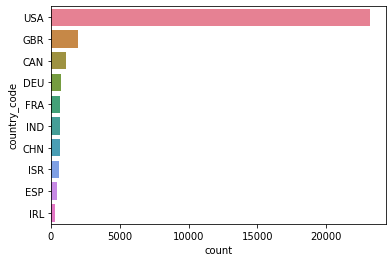

In [43]:
sns.countplot(y="country_code",data=sic,order=sic['country_code'].value_counts().iloc[:10].index,palette="husl")

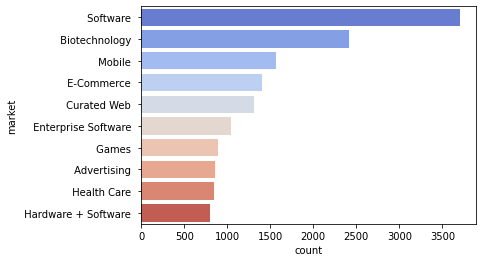

In [44]:
sns.countplot(y="market",data=sic,order=sic['market'].value_counts().iloc[:10].index,palette="coolwarm")

The above graph displays the top 10 markets

In [45]:
(sic['undisclosed'])

0                0
2                0
3                0
4                0
7                0
8                0
10               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
20               0
21               0
22               0
23               0
26               0
27               0
28               0
29               0
30               0
31               0
32               0
34               0
35               0
37               0
40               0
41               0
42               0
43               0
44               0
45               0
46               0
47               0
48               0
49               0
50               0
51               0
53               0
54               0
55               0
57               0
58               0
59               0
60               0
61               0
62               0
63               0
65         3248511
66               0
68          

# Feature Engineering

In [46]:
# from datetime import date
sic['Funding_difference']=(sic['last_funding_at'] - sic['first_funding_at'])

In [47]:
# sic['Funding_difference']=sic['Funding_difference'].astype('int64')
#Output is not int but float because of the NaN values.
sic['Funding_difference'] = sic['Funding_difference'].replace([np.inf, -np.inf], np.nan)


In [48]:
sic['years_operating'] = (2015 - (sic['founded_at']))

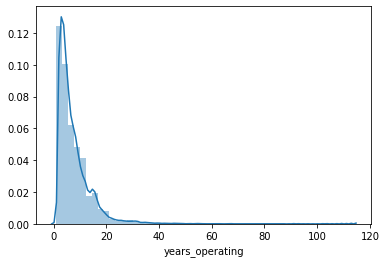

In [49]:
sns.distplot(sic['years_operating'])

In [50]:
sic.head()

market funding_total_usd     status country_code         region  \
0          News            1750000   acquired          USA  New York City   
2    Publishing              40000  operating          EST        Tallinn   
3   Electronics            1500000  operating          GBR         London   
4       Tourism              60000  operating          USA         Dallas   
7   Curated Web            2000000  operating          NaN            NaN   

   funding_rounds  founded_at founded_quarter  first_funding_at  \
0               1        2012               2            2012.0   
2               1        2012               4            2012.0   
3               1        2011               2            2011.0   
4               2        2014               1            2014.0   
7               1        2007               1            2008.0   

   last_funding_at     seed  venture  equity_crowdfunding  undisclosed  \
0           2012.0  1750000        0                    0            0   
2           2012.0    40000        0                    0            0   
3           2011.0  1500000        0                    0            0   
4           2014.0        0        0                60000            0   
7           2008.0        0  2000000                    0            0   

   convertible_note  debt_financing  angel  grant  private_equity  \
0                 0               0      0      0               0   
2                 0               0      0      0               0   
3                 0               0      0      0               0   
4                 0               0      0      0               0   
7                 0               0      0      0               0   

   post_ipo_equity  post_ipo_debt  secondary_market  product_crowdfunding  \
0                0              0                 0                     0   
2                0              0                 0                     0   
3                0              0                 0                     0   
4                0              0                 0                     0   
7                0              0                 0                     0   

   round_A  round_B  round_C  round_D  round_E  round_F  round_G  round_H  \
0        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   
7  2000000        0        0        0        0        0        0        0   

   Funding_difference  years_operating  
0                 0.0                3  
2                 0.0                3  
3                 0.0                4  
4                 0.0                1  
7                 0.0                8

In [51]:
# sic.isna().sum()

In [52]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37564 entries, 0 to 49437
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                35763 non-null  object 
 1   funding_total_usd     37564 non-null  object 
 2   status                37564 non-null  object 
 3   country_code          34627 non-null  object 
 4   region                34627 non-null  object 
 5   funding_rounds        37564 non-null  int64  
 6   founded_at            37564 non-null  int64  
 7   founded_quarter       37564 non-null  object 
 8   first_funding_at      37558 non-null  float64
 9   last_funding_at       37562 non-null  float64
 10  seed                  37564 non-null  int64  
 11  venture               37564 non-null  int64  
 12  equity_crowdfunding   37564 non-null  int64  
 13  undisclosed           37564 non-null  int64  
 14  convertible_note      37564 non-null  int64  
 15  debt_financing     

In [53]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sic.market = le.fit_transform(sic.market)
# sic.country_code = le.fit_transform(sic.country_code)
# sic.region = le.fit_transform(sic.region)

In [54]:
date_cols = ['first_funding_at', 'last_funding_at']
sic = pd.concat([sic, pd.get_dummies(sic[date_cols].astype(str))], axis=1)
sic = sic.drop(date_cols,axis=1)
sic.columns

Index(['market', 'funding_total_usd', 'status', 'country_code', 'region',
       'funding_rounds', 'founded_at', 'founded_quarter', 'seed', 'venture',
       ...
       'last_funding_at_2007.0', 'last_funding_at_2008.0',
       'last_funding_at_2009.0', 'last_funding_at_2010.0',
       'last_funding_at_2011.0', 'last_funding_at_2012.0',
       'last_funding_at_2013.0', 'last_funding_at_2014.0',
       'last_funding_at_2015.0', 'last_funding_at_nan'],
      dtype='object', length=102)

In [55]:
sic = pd.concat([sic, pd.get_dummies(sic['market'])], axis=1)
sic.drop('market',axis=1,inplace=True)
sic = pd.concat([sic, pd.get_dummies(sic['country_code'])], axis=1)
sic.drop('country_code',axis=1,inplace=True)
sic = pd.concat([sic, pd.get_dummies(sic['region'])], axis=1)
sic.drop('region',axis=1,inplace=True)
sic.columns


Index(['funding_total_usd', 'status', 'funding_rounds', 'founded_at',
       'founded_quarter', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note',
       ...
       'ZAF - Other', 'Zafirovo', 'Zagreb', 'Zanzibar Urban', 'Zaragoza',
       'Zhengzhou', 'Zhuhai', 'Zurich', 'Çan', 'Évry'],
      dtype='object', length=1945)

In [56]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37564 entries, 0 to 49437
Columns: 1945 entries, funding_total_usd to Évry
dtypes: float64(1), int64(24), object(3), uint8(1917)
memory usage: 78.2+ MB


In [57]:
# checking % of missing values

def missing_percent(dataframe):
    perct_missing_values = sic.isnull().sum()*100 / len(sic)
    print(perct_missing_values.sort_values())
print(missing_percent(sic))

funding_total_usd                          0.000000
Halifax                                    0.000000
Hainan                                     0.000000
Haifa                                      0.000000
Hagerstown                                 0.000000
HUN - Other                                0.000000
HI - Other                                 0.000000
Guwahati                                   0.000000
Guatemala City                             0.000000
Guangzhou                                  0.000000
Guangdong                                  0.000000
Guadalajara                                0.000000
Groningen                                  0.000000
Halle An Der Saale                         0.000000
Grenoble                                   0.000000
Greenville - Spartanburg                   0.000000
Greensboro                                 0.000000
Green Bay                                  0.000000
Graz                                       0.000000
Grand Rapids

In [58]:
# missing_bar()

In [59]:
# replacing missing amount with zero

sic['funding_total_usd'].replace(' -   ',0, inplace=True)
sic['funding_total_usd'].value_counts(dropna=False)

0              6189
1000000         678
100000          601
500000          595
40000           467
2000000         465
50000           425
250000          421
200000          357
1500000         344
10000000        329
3000000         317
25000           312
5000000         311
150000          306
300000          276
20000           246
4000000         240
6000000         211
2500000         207
400000          184
600000          174
20000000        163
15000000        159
1200000         155
10000           152
7000000         147
750000          146
8000000         139
3500000         137
12000000        130
30000           121
350000          121
800000          120
1300000         120
30000000        112
700000          110
1100000         104
25000000        102
15000           102
9000000          96
1250000          92
120000           89
4500000          89
450000           89
1400000          89
75000            88
1600000          85
125000           84
60000            83


In [60]:
sic['funding_total_usd']= sic['funding_total_usd'].str.strip()
sic['funding_total_usd']= sic['funding_total_usd'].fillna(0)
sic.funding_total_usd.value_counts(dropna=False)

0              6189
1000000         678
100000          601
500000          595
40000           467
2000000         465
50000           425
250000          421
200000          357
1500000         344
10000000        329
3000000         317
25000           312
5000000         311
150000          306
300000          276
20000           246
4000000         240
6000000         211
2500000         207
400000          184
600000          174
20000000        163
15000000        159
1200000         155
10000           152
7000000         147
750000          146
8000000         139
3500000         137
12000000        130
30000           121
350000          121
800000          120
1300000         120
30000000        112
700000          110
1100000         104
25000000        102
15000           102
9000000          96
1250000          92
120000           89
4500000          89
450000           89
1400000          89
75000            88
1600000          85
125000           84
60000            83


In [61]:
import sys
sys.maxsize
sic['funding_total_usd']=sic['funding_total_usd'].astype('int64')

In [62]:
sic['funding_rounds'].head()

0    1
2    1
3    1
4    2
7    1
Name: funding_rounds, dtype: int64

In [63]:
sic['per_round'] = sic['funding_total_usd'] / sic['funding_rounds']

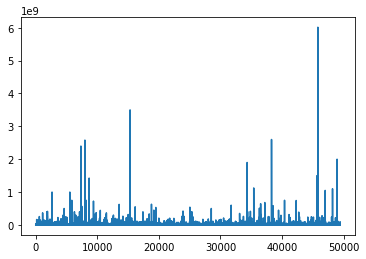

In [64]:
sic['per_round'].plot()

In [65]:
#These two are early funding rounds, A and Seed are early funding rounds

sic['funding_minus_A'] = sic['funding_total_usd'] - sic['round_A']
sic['funding_minus_seed'] = sic['funding_total_usd'] - sic['seed']
sic['funding_plus_seed'] = sic['funding_total_usd'] + sic['seed']

In [66]:
sic.tail()

funding_total_usd     status  funding_rounds  founded_at  \
49430           15419877     closed               4        1994   
49432            2686600  operating               1        2007   
49433             320000  operating               1        2013   
49435              97398  operating               5        2012   
49437           45000000  operating               4        1999   

      founded_quarter    seed   venture  equity_crowdfunding  undisclosed  \
49430               1       0   7991547                    0            0   
49432               1       0   2686600                    0            0   
49433               1  320000         0                    0            0   
49435               2   71525         0                    0            0   
49437               1       0  28000000                    0            0   

       convertible_note  debt_financing    angel    grant  private_equity  \
49430                 0               0  2007363  5400000           20967   
49432                 0               0        0        0               0   
49433                 0               0        0        0               0   
49435             25873               0        0        0               0   
49437                 0        17000000        0        0               0   

       post_ipo_equity  post_ipo_debt  secondary_market  product_crowdfunding  \
49430                0              0                 0                     0   
49432                0              0                 0                     0   
49433                0              0                 0                     0   
49435                0              0                 0                     0   
49437                0              0                 0                     0   

        round_A   round_B  round_C  round_D  round_E  round_F  round_G  \
49430   7991547         0        0        0        0        0        0   
49432   2686600         0        0        0        0        0        0   
49433         0         0        0        0        0        0        0   
49435         0         0        0        0        0        0        0   
49437  16000000  10000000        0        0        0        0        0   

       round_H  Funding_difference  years_operating  first_funding_at_1960.0  \
49430        0                 5.0               21                        0   
49432        0                 0.0                8                        0   
49433        0                 0.0                2                        0   
49435        0                 3.0                3                        0   
49437        0                 5.0               16                        0   

       first_funding_at_1973.0  first_funding_at_1974.0  \
49430                        0                        0   
49432                        0                        0   
49433                        0                        0   
49435                        0                        0   
49437                        0                        0   

       first_funding_at_1979.0  first_funding_at_1984.0  \
49430                        0                        0   
49432                        0                        0   
49433                        0                        0   
49435                        0                        0   
49437                        0                        0   

       first_funding_at_1985.0  first_funding_at_1986.0  \
49430                        0                        0   
49432                        0                        0   
49433                        0                        0   
49435                        0                        0   
49437                        0                        0   

       first_funding_at_1987.0  first_funding_at_1989.0  \
49430                        0                        0   
49432                        0                        0   
49433                  

In [67]:
sic=sic.replace({'status':{'closed':0,'acquired':1,'operating':0}})

In [68]:
sic = sic.loc[:, sic.eq(0).mean().le(.99)]

len(sic.columns)

88

In [69]:
sic.head()

funding_total_usd  status  funding_rounds  founded_at founded_quarter  \
0            1750000       1               1        2012               2   
2              40000       0               1        2012               4   
3            1500000       0               1        2011               2   
4              60000       0               2        2014               1   
7            2000000       0               1        2007               1   

      seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
0  1750000        0                    0            0                 0   
2    40000        0                    0            0                 0   
3  1500000        0                    0            0                 0   
4        0        0                60000            0                 0   
7        0  2000000                    0            0                 0   

   debt_financing  angel  grant  private_equity  round_A  round_B  round_C  \
0               0      0      0               0        0        0        0   
2               0      0      0               0        0        0        0   
3               0      0      0               0        0        0        0   
4               0      0      0               0        0        0        0   
7               0      0      0               0  2000000        0        0   

   round_D  round_E  Funding_difference  years_operating  \
0        0        0                 0.0                3   
2        0        0                 0.0                3   
3        0        0                 0.0                4   
4        0        0                 0.0                1   
7        0        0                 0.0                8   

   first_funding_at_2005.0  first_funding_at_2006.0  first_funding_at_2007.0  \
0                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
7                        0                        0                        0   

   first_funding_at_2008.0  first_funding_at_2009.0  first_funding_at_2010.0  \
0                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
7                        1                        0                        0   

   first_funding_at_2011.0  first_funding_at_2012.0  first_funding_at_2013.0  \
0                        0                        1                        0   
2                        0                        1                        0   
3                        1                        0                        0   
4                        0                        0                        0   
7                        0                        0                        0   

   first_funding_at_2014.0  last_funding_at_2005.0  last_funding_at_2006.0  \
0                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        1                       0                       0   
7                        0                       0                       0   

   last_funding_at_2007.0  last_funding_at_2008.0  last_funding_at_2009.0  \
0                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                    

In [70]:
sic.shape

(37564, 88)

In [71]:
# rechecking missing values

sic.isna().sum()

funding_total_usd          0
status                     0
funding_rounds             0
founded_at                 0
founded_quarter            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
Funding_difference         6
years_operating            0
first_funding_at_2005.0    0
first_funding_at_2006.0    0
first_funding_at_2007.0    0
first_funding_at_2008.0    0
first_funding_at_2009.0    0
first_funding_at_2010.0    0
first_funding_at_2011.0    0
first_funding_at_2012.0    0
first_funding_at_2013.0    0
first_funding_at_2014.0    0
last_funding_at_2005.0     0
last_funding_at_2006.0     0
last_funding_at_2007.0     0
last_funding_a

In [72]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37564 entries, 0 to 49437
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_total_usd        37564 non-null  int64  
 1   status                   37564 non-null  int64  
 2   funding_rounds           37564 non-null  int64  
 3   founded_at               37564 non-null  int64  
 4   founded_quarter          37564 non-null  object 
 5   seed                     37564 non-null  int64  
 6   venture                  37564 non-null  int64  
 7   equity_crowdfunding      37564 non-null  int64  
 8   undisclosed              37564 non-null  int64  
 9   convertible_note         37564 non-null  int64  
 10  debt_financing           37564 non-null  int64  
 11  angel                    37564 non-null  int64  
 12  grant                    37564 non-null  int64  
 13  private_equity           37564 non-null  int64  
 14  round_A               

In [73]:
# conveting into integer

sic['founded_quarter']=sic['founded_quarter'].astype('int64')
sic['per_round']=sic['per_round'].astype('int64')

In [74]:
# filling missing value with forward value

sic['Funding_difference'].isna().sum()
sic['Funding_difference'].fillna(method='ffill',inplace=True)

In [75]:
print(sic['Funding_difference'].isna().sum())

0


# Standarizing the Data

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
# x and y axes

X = sic.drop('status',axis=1)
Y = sic['status']

In [78]:
# splitting data in train and test

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.30, random_state = 10)

In [79]:
# standarize

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_valid=sc.transform(X_valid)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


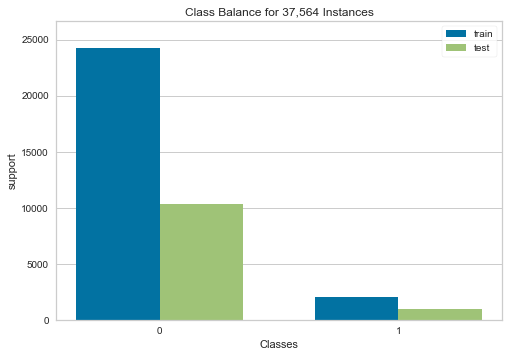

In [80]:
# visualizing the results

from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train,y_valid)
visualizer.ax.set_xlabel("Classes")
visualizer.ax.set_ylabel("Amount of Occurrences of Class")
visualizer.show()

# Synthetic Minority Oversampling Technique [SMOTE]

synthesizes new examples for the minority class

In [81]:
from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(Y.value_counts())
smote = SMOTE(random_state=0)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train) 
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_re).value_counts()) 

Using TensorFlow backend.


Original class distribution: 

0    34593
1     2971
Name: status, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    24243
0    24243
Name: status, dtype: int64


**As we can see, the distribution has been balanced now**

# 1. SVM

In [82]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC

In [83]:
svm_classifier= SVC(probability=True, kernel='rbf')
svm_classifier.fit(X_train_re,y_train_re)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
# Predict
y_pred_svm= svm_classifier.predict(X_valid)

#Classification Report
print(classification_report(y_valid,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     10350
           1       0.25      0.55      0.34       920

    accuracy                           0.83     11270
   macro avg       0.60      0.70      0.62     11270
weighted avg       0.90      0.83      0.86     11270



Text(52.0, 0.5, 'predicted label')

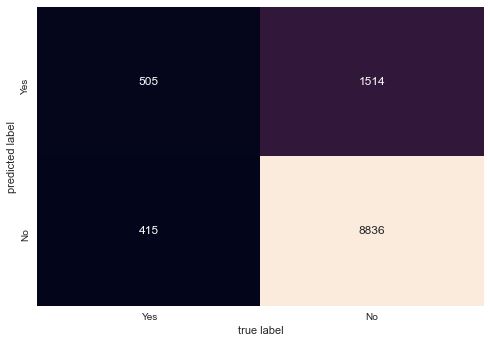

In [85]:
mat_svm = confusion_matrix(y_valid, y_pred_svm, labels = [1,0])
sns.heatmap(mat_svm.T,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [86]:
print(mat_svm)

[[ 505  415]
 [1514 8836]]


In [87]:
TP=mat_svm[0,0]
FN=mat_svm[0,1]
FP=mat_svm[1,0]
TN=mat_svm[1,1]
Recall=TP/(TP+FN)
print("Recall: ",Recall)
Precision=TP/(TP+FP)
print("Precision: ",Precision)
FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Recall:  0.5489130434782609
Precision:  0.2501238236750867
F-Measure:  0.34365430418509696


# The receiver operating characteristic (ROC) - SVM

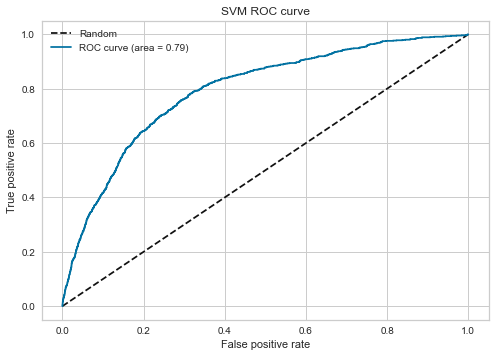

In [88]:
y_pred_svm_proba=svm_classifier.predict_proba(X_valid)[:,1]
fpr_svm, tpr_svm, _svm = roc_curve(y_valid, y_pred_svm_proba)
roc_auc=auc(fpr_svm,tpr_svm)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')

plt.plot(fpr_svm,tpr_svm,label='ROC curve (area = %0.2f)' %roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('SVM ROC curve')
plt.legend(loc='best')

In [89]:
svm_classifier.score(X_valid,y_valid)

0.8288376220053238

In [90]:
svm_classifier.score(X_train_re,y_train_re)

0.892525677515159

In [91]:
from yellowbrick.classifier import ClassificationReport

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


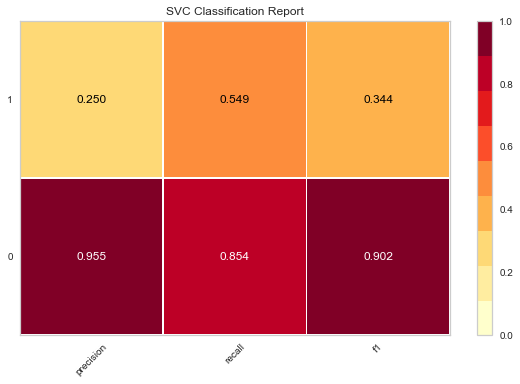

In [92]:
svccr = ClassificationReport(SVC(probability=True))
svccr.fit(X_train_re, y_train_re)
svccr.score(X_valid, y_valid)
svccr.show()

For financial strategies, early funding is best, focusing on seed funding especially. The first rounds are most important for a company to get acquired. Look for venture capital to fund your business as well.

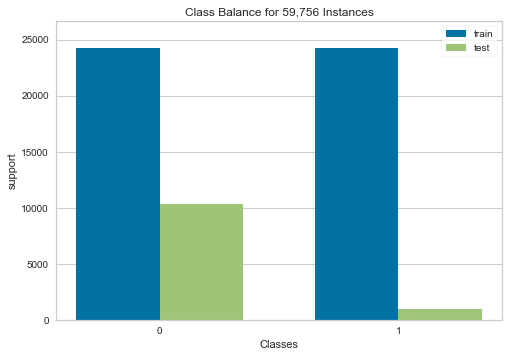

In [93]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train_re,y_valid)
visualizer.ax.set_xlabel("Classes")
visualizer.ax.set_ylabel("Amount of Occurrences of Class")
visualizer.show()

# 2. LOGISTIC REGRESSION

# Without using SMOTE

In [94]:
from sklearn.linear_model import LogisticRegression

# initiating the classifier and training the model

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
# Predicting the test set results and calculating the accuracy

y_pred_logit = classifier.predict(X_valid)
classifier.score(X_valid, y_valid)

0.9184560780834072

In [96]:
classifier.score(X_train, y_train)

0.9217311934281586

In [97]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix_logit = confusion_matrix(y_valid, y_pred_logit)
print(matrix_logit)

[[10287    63]
 [  856    64]]


The result is telling us that we have 10287+64 correct predictions and 856+63 incorrect predictions.

In [98]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_logit))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10350
           1       0.50      0.07      0.12       920

    accuracy                           0.92     11270
   macro avg       0.71      0.53      0.54     11270
weighted avg       0.89      0.92      0.89     11270



In [99]:
# Compute precision, recall, F-measure and support

TP=matrix_logit[0,0]
FN=matrix_logit[0,1]
FP=matrix_logit[1,0]
TN=matrix_logit[1,1]

Precision=TP/(TP+FP)
print("Precision: ",Precision)

Recall=TP/(TP+FN)
print("Recall: ",Recall)

FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Precision:  0.9231804720452302
Recall:  0.9939130434782608
F-Measure:  0.9572418927092542


In [100]:
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score is weighted harmonic mean of the precision and recall and is between 0 < F-beta < 1 where 0= worst and 1=best

# ROC - Logistic Regression

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

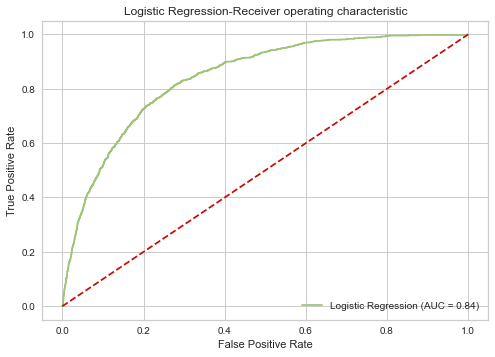

The AUC: 0.842482881747532


In [102]:
##computing fpr and tpr we plot tpr vs fpr

logit_roc_auc=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold=roc_curve(y_valid,logit_roc_auc)
roc_auc=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'g',label='Logistic Regression (AUC = %0.2f)'% roc_auc)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression-Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

print('The AUC:', auc(fpr,tpr))

# Using SMOTE

In [103]:
# initiating the classifier and training the model

classifier.fit(X_train_re, y_train_re)

# Predicting the test set results and calculating the accuracy

y_pred_logit = classifier.predict(X_valid)
classifier.score(X_valid, y_valid)

0.7498669032830524

In [104]:
# training dataset score

classifier.score(X_train_re, y_train_re)

0.78045208926288

In [105]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix_logit_smote = confusion_matrix(y_valid, y_pred_logit)
print(matrix_logit_smote)

[[7736 2614]
 [ 205  715]]


In [106]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_logit))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     10350
           1       0.21      0.78      0.34       920

    accuracy                           0.75     11270
   macro avg       0.59      0.76      0.59     11270
weighted avg       0.91      0.75      0.80     11270



In [107]:
# Compute precision, recall, F-measure and support

TP=matrix_logit_smote[0,0]
FN=matrix_logit_smote[0,1]
FP=matrix_logit_smote[1,0]
TN=matrix_logit_smote[1,1]

Precision_smote=TP/(TP+FP)
print("Precision_smote: ",Precision_smote)

Recall_smote=TP/(TP+FN)
print("Recall_smote: ",Recall_smote)

FM_smote=(2*Recall_smote*Precision_smote)/(Recall_smote+Precision_smote)
print("F-Measure_smote: ",FM_smote)

Precision_smote:  0.9741846115098854
Recall_smote:  0.7474396135265701
F-Measure_smote:  0.8458804876715325


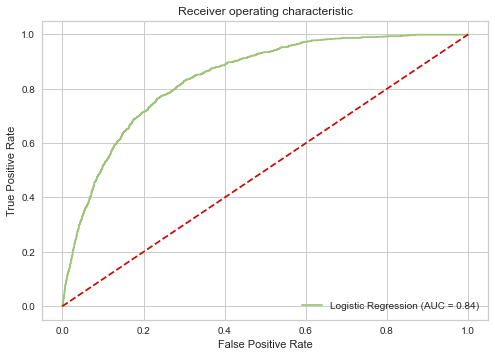

In [108]:
##computing fpr and tpr we plot tpr vs fpr

logit_roc_auc_smote=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold_smote=roc_curve(y_valid,logit_roc_auc_smote)
roc_auc_smote=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'g',label='Logistic Regression (AUC = %0.2f)'% roc_auc_smote)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

#print('The AUC (smote):',auc(fpr,tpr))


# 3. KNN MODEL using SMOTE

In [109]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train_re, y_train_re)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [110]:
from sklearn import metrics
y_pred_knn = classifier.predict(X_valid)

In [111]:
classifier.score(X_valid, y_valid)

0.7848269742679681

In [112]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,y_pred_knn))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,y_pred_knn))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,y_pred_knn)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,y_pred_knn))

Mean Absolute Error:  0.21517302573203195
Mean Squared Error:  0.21517302573203195
Root Mean Squared Error:  0.4638674656968647
Explained Variance Score:  -1.572701218231464


In [113]:
print(metrics.accuracy_score(y_valid, y_pred_knn))
r2 = metrics.r2_score(y_valid, y_pred_knn)

0.7848269742679681


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
mat_knn_smote=confusion_matrix(y_valid, y_pred_knn)
print(mat_knn_smote)

[[8296 2054]
 [ 371  549]]


In [115]:
print(classification_report(y_valid, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     10350
           1       0.21      0.60      0.31       920

    accuracy                           0.78     11270
   macro avg       0.58      0.70      0.59     11270
weighted avg       0.90      0.78      0.83     11270



In [116]:
# Compute precision, recall, F-measure and support

TP=mat_knn_smote[0,0]
FN=mat_knn_smote[0,1]
FP=mat_knn_smote[1,0]
TN=mat_knn_smote[1,1]

knn_precision_smote=TP/(TP+FP)
print("KNN Precision_smote: ",knn_precision_smote)

knn_recall_smote=TP/(TP+FN)
print("KNN Recall_smote: ",knn_recall_smote)

knn_FM_smote=(2*knn_recall_smote*knn_precision_smote)/(knn_recall_smote+knn_precision_smote)
print("KNN F-Measure_smote: ",knn_FM_smote)

KNN Precision_smote:  0.9571939540786892
KNN Recall_smote:  0.8015458937198068
KNN F-Measure_smote:  0.8724825156438974


# ROC - KNN

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

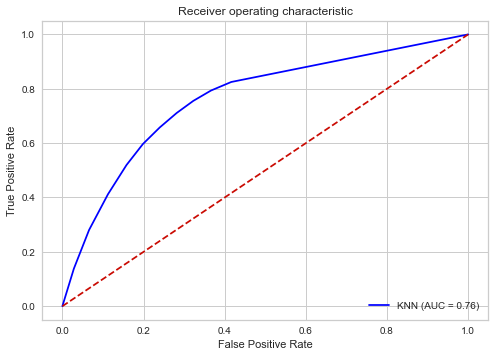

The AUC (smote): 0.7612737345095568


In [118]:
##computing fpr and tpr we plot tpr vs fpr

knn_roc_auc_smote=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold_smote=roc_curve(y_valid,knn_roc_auc_smote)
roc_auc_smote=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'blue',label='KNN (AUC = %0.2f)'% roc_auc_smote)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

print('The AUC (smote):',auc(fpr,tpr))